In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

from sklearn.linear_model import LinearRegression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#  Import and read the csv.
import pandas as pd 
happiness_df = pd.read_csv("Cleaned_Data/World_Happiness_Report_2021.csv")
happiness_df

,Country,Year,World_Region,Happiness_Score,Economic_Production,Social_Support,Life_Expectancy,Freedom,Generosity,Perceptions_of_Corruption
0,Finland,2021,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
1,Denmark,2021,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179
2,Switzerland,2021,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292
3,Iceland,2021,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673
4,Netherlands,2021,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,2021,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,2021,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,2021,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,2021,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821


In [2]:
# Split our preprocessed data into our features and target arrays
y = happiness_df["Happiness_Score"] # y = dependent = ladder score
X = happiness_df[["Economic_Production", "Social_Support", "Life_Expectancy", "Freedom", "Generosity", "Perceptions_of_Corruption"]] # X = independent = any other variable



# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)

In [3]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [4]:
# Introduce regressor
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [5]:
# Print the intercept and coefficients
print("Intercept: ", regressor.intercept_)
print("Coefficients:")
list(zip(X, regressor.coef_))

Intercept:  -2.167224712937224
Coefficients:


[('Economic_Production', 0.4297100109429013),
 ('Social_Support', 2.0546197154703107),
 ('Life_Expectancy', 0.01290383869231573),
 ('Freedom', 2.040793288242513),
 ('Generosity', 0.25613377588827974),
 ('Perceptions_of_Corruption', -0.6513465434680765)]

In [6]:
# Create vector of predictions
y_pred = regressor.predict(X_test)

In [7]:
print(f"Prediction: {y_pred}")

Prediction: [5.64414469 6.40482825 4.38150476 6.17719917 5.06042868 3.78784776
 5.58907958 7.25069455 4.19314239 5.88790867 6.19949224 4.60807686
 6.30110582 6.61216357 4.31369108 4.3101189  5.54484088 5.22940548
 5.04842894 4.14038789 5.35691898 7.47604458 5.50869427 5.56598546
 5.51664927 2.91965714 5.78780017 6.59068862 6.23350573 4.74840114
 5.68210903 5.39410779 4.13201431 6.78475433 6.80197603 5.68303418
 6.33959852 5.78405345 3.6425882  4.51327682 6.08165746 4.447137
 5.32582669 5.42237886 6.12914401]


In [8]:
# Show actual value with predicted value
regressor_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
values = regressor_diff.sort_values('Actual value', ascending=False)
values

,Actual value,Predicted value
1,7.620,7.250695
11,7.157,6.404828
12,7.155,6.784754
15,7.069,6.177199
16,7.064,6.801976
20,6.690,6.590689
26,6.491,6.301106
28,6.461,6.612164
29,6.435,5.565985
31,6.377,7.476045


In [9]:
#Model Evaluation
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared: {:.2f}'.format(regressor.score(X, y)))
print('Mean Absolute Error:', MAE)
print('Mean Square Error:', MSE)
print('Root Mean Square Error:', RMSE)

R squared: 0.75
Mean Absolute Error: 0.4918088647875647
Mean Square Error: 0.37896023383888716
Root Mean Square Error: 0.6155974608775504


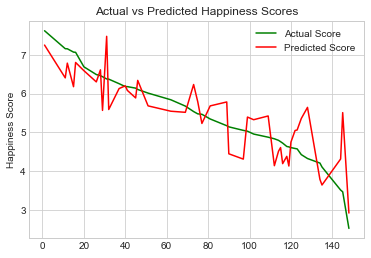

In [10]:
actual = values['Actual value']
predicted = values['Predicted value']
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots()

ax.plot(actual, color = 'green', label = 'Actual Score')
ax.plot(predicted, color = 'red', label = 'Predicted Score')
ax.set(xlabel='', ylabel='Happiness Score',
       title='Actual vs Predicted Happiness Scores');
ax.legend(loc = 'upper right')
plt.show()

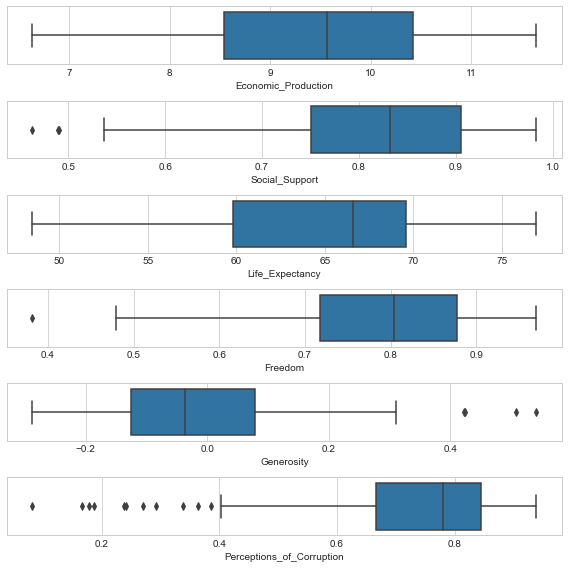

In [11]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
fig, axs = plt.subplots(6, figsize = (8,8))
plt1 = sns.boxplot(happiness_df['Economic_Production'], ax = axs[0])
plt2 = sns.boxplot(happiness_df['Social_Support'], ax = axs[1])
plt3 = sns.boxplot(happiness_df['Life_Expectancy'], ax = axs[2])
plt4 = sns.boxplot(happiness_df['Freedom'], ax = axs[3])
plt5 = sns.boxplot(happiness_df['Generosity'], ax = axs[4])
plt6 = sns.boxplot(happiness_df['Perceptions_of_Corruption'], ax = axs[5])
plt.tight_layout()

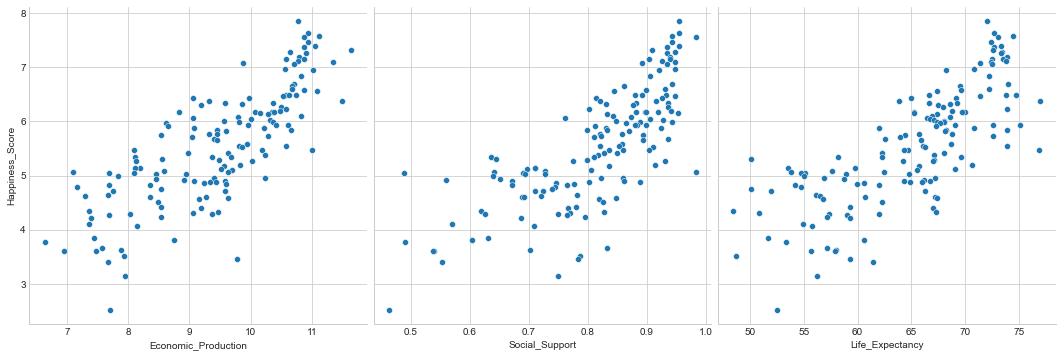

In [12]:
sns.pairplot(happiness_df, x_vars=["Economic_Production", "Social_Support", "Life_Expectancy"],
             y_vars="Happiness_Score", height=5, aspect=1, kind='scatter')
plt.show()

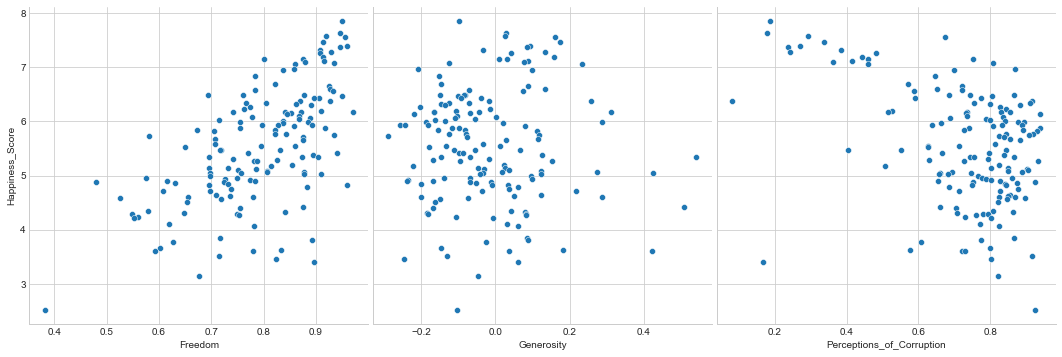

In [13]:
sns.pairplot(happiness_df, x_vars=["Freedom", "Generosity", "Perceptions_of_Corruption"],
             y_vars="Happiness_Score", height=5, aspect=1, kind='scatter')
plt.show()

<AxesSubplot:xlabel='Economic_Production', ylabel='Density'>

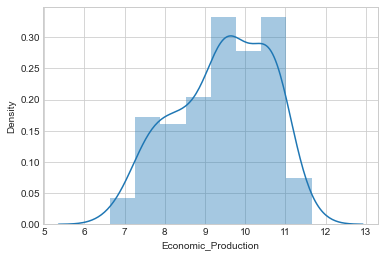

In [14]:
sns.distplot(happiness_df['Economic_Production'])


<AxesSubplot:xlabel='Social_Support', ylabel='Density'>

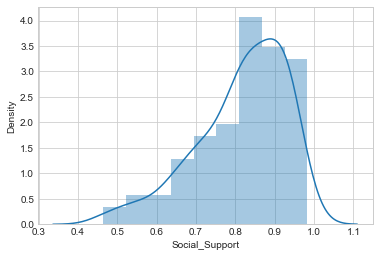

In [15]:
sns.distplot(happiness_df['Social_Support'])

<AxesSubplot:xlabel='Life_Expectancy', ylabel='Density'>

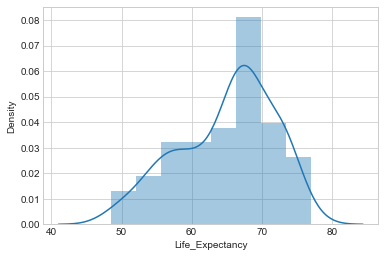

In [16]:
sns.distplot(happiness_df['Life_Expectancy'])

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

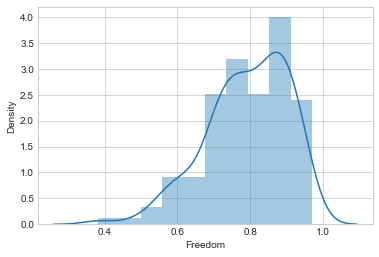

In [17]:
sns.distplot(happiness_df['Freedom'])

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

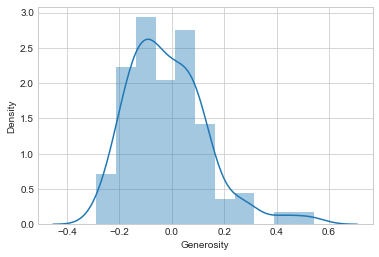

In [18]:
sns.distplot(happiness_df['Generosity'])

<AxesSubplot:xlabel='Perceptions_of_Corruption', ylabel='Density'>

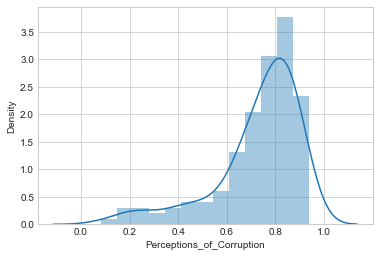

In [19]:
sns.distplot(happiness_df['Perceptions_of_Corruption'])